# Time Series on Financial Applications  
### Section 2: ARMA

# Problem 1
We will study analytical properties of AR(1) process using Python. Please consider the following AR(1) time series   

$$(1-\phi L)x_t=u_t,$$   
where  $u_t$ is Gaussian White Noise with $Var(u_t)=1$. Here, $L$ denotes the lag operator.

(a) For $\phi=0.5$, use ArmaProcess() method of statsmodels.tsa to create an object that corresponds to AR(1) process. Compute the ACF for lags between 0 and 40. Plot the ACF.

In [25]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [26]:
# AR(1) with phi = 0.5

phi = np.array([0.5])
theta = np.array([0.])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

coefficients of the autoregressive operator: [ 1.  -0.5]
coefficients of the moving average operator: [1. 0.]


Theoretical rho(h) of AR(1) with phi=+0.5:
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04 1.22070312e-04 6.10351562e-05 3.05175781e-05
 1.52587891e-05 7.62939453e-06 3.81469727e-06 1.90734863e-06
 9.53674316e-07 4.76837158e-07 2.38418579e-07 1.19209290e-07
 5.96046448e-08 2.98023224e-08 1.49011612e-08 7.45058060e-09
 3.72529030e-09 1.86264515e-09 9.31322575e-10 4.65661287e-10
 2.32830644e-10 1.16415322e-10 5.82076609e-11 2.91038305e-11
 1.45519152e-11 7.27595761e-12 3.63797881e-12 1.81898940e-12]


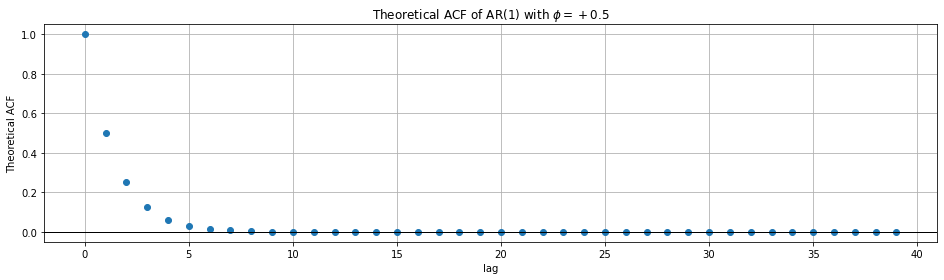

In [27]:
h_max = 40
rho = arma_process.acf(h_max)
print("Theoretical rho(h) of AR(1) with phi=+0.5:\n",rho)

plt.figure(figsize=(16,4))
plt.plot(rho,linestyle='None',marker='o')
plt.ylim(-0.05, 1.05)
plt.axhline(linewidth=1, color='k')
plt.xlabel("lag")
plt.ylabel("Theoretical ACF")
plt.title("Theoretical ACF of AR(1) with $\phi=+0.5$")
plt.grid(True)
plt.show()

# Problem 2 
Please pick causal AR(3) of your choice. Explicitly demonstrate that the process is stationary. Generate the time series $x_t$ of $n=100$ observations. Compute the "fitted values" for $t=4,5,\ldots,n$ and "forecasts" of $x_t$ for $t=n+1,n+2,\ldots,n+m$. 

In [28]:
# generate n observations of AR(3)
phi =   np.array([0.5, -0.2, 0.1])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]


print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)


np.random.seed(1678)
n= 100
xt = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)

coefficients of the autoregressive operator: [ 1.  -0.5  0.2 -0.1]
coefficients of the moving average operator: [1. 0.]


In [29]:
arma_process.isstationary

True

In [30]:
# estimate parameters of AR(3) based on the sample run xt of n observations
p = 3
model = ARIMA(xt, order=(p,0,0))
model_fit = model.fit(method='css')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(3, 0)   Log Likelihood                -113.502
Method:                           css   S.D. of innovations              0.780
Date:                Thu, 24 Nov 2022   AIC                            237.004
Time:                        17:05:27   BIC                            249.877
Sample:                             3   HQIC                           242.209
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3112      0.090      3.474      0.001       0.136       0.487
ar.L1.y        0.4168      0.101      4.112      0.000       0.218       0.615
ar.L2.y       -0.2626      0.107     -2.450      0.0

In [31]:
# forecast m steps ahead starting from n+1
m=10
xt_forecasted = model_fit.predict(start=n+1, end=n+m-1)
xt_forecasted

array([-0.17870931,  0.25798492,  0.4437764 ,  0.39917023,  0.31510209,
        0.28468112,  0.29578502,  0.31161399,  0.31645718,  0.31389438])

# Problem 3 
Load the Dow Jones Industrial Average (DJIA) from djia.csv. Use on the percentage change of Close value of the index ('Close' column) in estimation.

(a) Estimate MA(2) model.

(b) Estimate ARMA(1,1) model.

(a)

In [32]:
df = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')  # load the data and we call the data as "df"
close = df["Close"]
ln_close = np.log(close)
r = ln_close.diff(1)
r = r[1:len(r)]

In [33]:
model = ARIMA(r, order=(0,0,2))
model_fit = model.fit(method='css')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2517
Model:                     ARMA(0, 2)   Log Likelihood                7558.146
Method:                           css   S.D. of innovations              0.012
Date:                Thu, 24 Nov 2022   AIC                         -15108.293
Time:                        17:05:27   BIC                         -15084.969
Sample:                             0   HQIC                        -15099.828
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.000      0.918      0.359      -0.000       0.001
ma.L1.Close    -0.1039      0.020     -5.172      0.000      -0.143      -0.065
ma.L2.Close    -0.0528      0.021     -2.533    

(b)

In [34]:
model = ARIMA(r, order=(1,0,1))
model_fit = model.fit(method='css')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2517
Model:                     ARMA(1, 1)   Log Likelihood                7553.352
Method:                           css   S.D. of innovations              0.012
Date:                Thu, 24 Nov 2022   AIC                         -15098.704
Time:                        17:05:27   BIC                         -15075.383
Sample:                             1   HQIC                        -15090.240
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.000      0.916      0.359      -0.000       0.001
ar.L1.Close     0.2919      0.161      1.818      0.069      -0.023       0.607
ma.L1.Close    -0.4022      0.154     -2.614    